## Import Python Libraries

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Read the Dataset

In [379]:
# Reading the dataset to a DataFrame
data = pd.read_csv('./amazon.csv')

## Examine the Data

In [380]:
# Examining the first 5 rows
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [381]:
# Examining the last 5 rows
data.tail()  

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [382]:
# Overview of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Check for Duplicates

In [383]:
# Number of unique values
data.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [384]:
# Sum of null values
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [385]:
# Displaying the percentage of null values
(data.isnull().sum() / len(data)) * 100

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.000000
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

## Data Reduction
### To reduce the amount of data in our dataset, by evaluating which column(s) and row(s) do not add value to the analysis.
- Columns: Columns that either do not yield any analytical value for pricing trends/consumer preferences or are not useful for the purpose of the analysis (user_id, user_name, img_link, product_link).
- Rows: Entries where the main category is not 'Electronics': Simplifies the data so that only electronics-related purchases remain.

In [386]:
# Dropping unnecessary columns
data.drop(['user_id', 'user_name', 'img_link', 'product_link'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   review_id            1465 non-null   object
 10  review_title         1465 non-null   object
 11  review_content       1465 non-null   object
dtypes: object(12)
memory usage: 137.5+ KB


In [387]:
for category in data.category.str.split('|'):                            # Dropping rows that are not electronics-related
    main_category = category[0]                                          
    if main_category != 'Electronics':                                   # Checking if 'Electronics' is not the main category
        data = data[data.category.str.contains(main_category) == False]  # Drop the entry where 'Electronics' is not the main category     

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 12 to 1021
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           526 non-null    object
 1   product_name         526 non-null    object
 2   category             526 non-null    object
 3   discounted_price     526 non-null    object
 4   actual_price         526 non-null    object
 5   discount_percentage  526 non-null    object
 6   rating               526 non-null    object
 7   rating_count         526 non-null    object
 8   about_product        526 non-null    object
 9   review_id            526 non-null    object
 10  review_title         526 non-null    object
 11  review_content       526 non-null    object
dtypes: object(12)
memory usage: 53.4+ KB


## Data Cleaning/Wrangling
- discounted_price, actual_price: The currency value for these two columns are in INR and needs to be converted to USD. The INR symbol needs to be omitted to convert the data type of discounted_price and actual_price to be type float.
- discount_percentage: Omit the '%' for typecasting as type float.
- rating: Convert data type to numeric.
- rating_count: Convert data type to numeric.

In [388]:
# INR to USD conversion and typecasting to type float for actual_price
data.actual_price = data.actual_price.replace('[₹,]', '', regex=True).astype(np.float64)
data.actual_price = (data.actual_price * .012).round(2)

# INR to USD conversion and typecasting to type float for discounted_price
data.discounted_price = data.discounted_price.replace('[₹,]', '', regex=True).astype(np.float64)
data.discounted_price = (data.discounted_price * .012).round(2)

# Converting the discount_percentage column to numeric type
data.discount_percentage = ('.' + data.discount_percentage.replace('[%,]', '', regex=True)).astype(np.float64)

# Checking the first 5 rows to ensure correct currency and data type conversion
data[['actual_price', 'discounted_price', 'discount_percentage']].head()

,actual_price,discounted_price,discount_percentage
12,8.40,2.63,0.69
16,299.99,167.99,0.44
19,263.88,161.88,0.39
21,5.99,3.35,0.44
22,274.80,161.88,0.41


In [389]:
# Converting the rating column to numeric
data.rating = data.rating.astype(np.float64)

# Omitting the ',' and converting the rating_count column to numeric
data.rating_count = data.rating_count.replace('[,]', '', regex=True).astype(np.int64)

# Display the first 5 rows to ensure correct type conversion
data[['rating', 'rating_count']].head()

,rating,rating_count
12,4.4,426973
16,4.2,32840
19,4.3,11976
21,3.7,10962
22,4.3,16299


## Feature Engineering
### 1. Discount Amount
- Calculate the absolute discount amount for each product via subtracting discounted price and actual price.
### 2. Price-to-Rating Ratio
- A Ratio for providing insights into whether higher-priced items tend to have higher or lower ratings.
### 3. Sentiment Score of Reviews
- Use of Natural Language Processing to calculate a sentiment score for each review.
### 4. Category Levels
- Splitting the hierarchical data contained in the category column into separate columns for more detailed category analysis.
### 5. Price Range Category
- Categorize products into different price ranges for analyzing consumer behavior across various price segments.

In [390]:
# Creating discount amount column
data['discount_amount'] = data.actual_price - data.discounted_price
data.discount_amount.head()

12      5.77
16    132.00
19    102.00
21      2.64
22    112.92
Name: discount_amount, dtype: float64

In [391]:
# Creating price-to-rating column
data['price_to_rating'] = data.discounted_price / data.rating
data.price_to_rating.head()

12     0.597727
16    39.997619
19    37.646512
21     0.905405
22    37.646512
Name: price_to_rating, dtype: float64

In [392]:
# Creating sentiment score of reviews
data['review_sentiment'] = data.review_content.apply(
    lambda content: TextBlob(content).sentiment.polarity
)
data.review_sentiment.head()

12    0.374790
16    0.404615
19    0.378333
21    0.138056
22   -0.172245
Name: review_sentiment, dtype: float64

In [393]:
# Splitting the categories
split_categories = data.category.str.split('|', expand=True)

# Assigning new columns to the DataFrame
data['main_category'] = split_categories[1]  # All entries are electronics, so the new main category is the first sub-category in the hierarchy
data['sub_category'] = split_categories[2]
data['item_type'] = split_categories[3]

# Dropping the original 'category' column as it's no longer needed
data.drop('category', axis=1, inplace=True)
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,discount_amount,price_to_rating,review_sentiment,main_category,sub_category,item_type
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,2.63,8.40,0.69,4.4,426973,"Flexible, lightweight HDMI cable for connectin...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,5.77,0.597727,0.374790,"HomeTheater,TV&Video",Accessories,Cables
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,167.99,299.99,0.44,4.2,32840,"Note : The brands, Mi and Xiaomi, are part of ...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,132.00,39.997619,0.404615,"HomeTheater,TV&Video",Televisions,SmartTelevisions
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,161.88,263.88,0.39,4.3,11976,Resolution: HD Ready (1366x768) | Refresh Rate...,"R2PNR69G0BQG2F,R31A0WWDEYMKEW,R2C4XEWFLVU7JV,R...","Sound quality,Very nice,Value for money,Good,G...","LG was always Good , correct delivery, good se...",102.00,37.646512,0.378333,"HomeTheater,TV&Video",Televisions,SmartTelevisions
21,B085194JFL,tizum HDMI to VGA Adapter Cable 1080P for Proj...,3.35,5.99,0.44,3.7,10962,Superior Stability: Built-in advanced Certifie...,"R1GYK05NN6747O,R1J21BZ29NGQF9,R16JCHEILBYOMW,R...","Good product ; Average Finishing,Save it purpo...",This connector has provided as a boon for my o...,2.64,0.905405,0.138056,"HomeTheater,TV&Video",Accessories,Cables
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,161.88,274.80,0.41,4.3,16299,Resolution: HD Ready (1366x768) | Refresh Rate...,"R1SN0D4DFBKAZI,R1SX5L77L2CD6V,R1NAZ6M4QBUJMK,R...","Good,Sound is very low another brand comparing...","Overall good.,TV picture ok smart betterSound ...",112.92,37.646512,-0.172245,"HomeTheater,TV&Video",Televisions,SmartTelevisions


In [394]:
# Creating price range column
data['price_range'] = pd.cut(
    data.discounted_price, 
    bins=[0, 50, 100, 500, 1000, np.inf], 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)
data.price_range.head()

12    Very Low
16      Medium
19      Medium
21    Very Low
22      Medium
Name: price_range, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [395]:
# Display the first 5 rows of the newly added columns
data.loc[:, 'discount_amount': 'price_range'].head()

,discount_amount,price_to_rating,review_sentiment,main_category,sub_category,item_type,price_range
12,5.77,0.597727,0.374790,"HomeTheater,TV&Video",Accessories,Cables,Very Low
16,132.00,39.997619,0.404615,"HomeTheater,TV&Video",Televisions,SmartTelevisions,Medium
19,102.00,37.646512,0.378333,"HomeTheater,TV&Video",Televisions,SmartTelevisions,Medium
21,2.64,0.905405,0.138056,"HomeTheater,TV&Video",Accessories,Cables,Very Low
22,112.92,37.646512,-0.172245,"HomeTheater,TV&Video",Televisions,SmartTelevisions,Medium


In [396]:
# Display the DataFrame overview after modifications
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 12 to 1021
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           526 non-null    object  
 1   product_name         526 non-null    object  
 2   discounted_price     526 non-null    float64 
 3   actual_price         526 non-null    float64 
 4   discount_percentage  526 non-null    float64 
 5   rating               526 non-null    float64 
 6   rating_count         526 non-null    int64   
 7   about_product        526 non-null    object  
 8   review_id            526 non-null    object  
 9   review_title         526 non-null    object  
 10  review_content       526 non-null    object  
 11  discount_amount      526 non-null    float64 
 12  price_to_rating      526 non-null    float64 
 13  review_sentiment     526 non-null    float64 
 14  main_category        526 non-null    object  
 15  sub_category         522 n

## Examine the Summary Statistics

In [397]:
# Display the summary statistics transposed
data.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,526.0,71.592281,123.355962,0.95000,4.790000,16.790000,86.690000,935.880000
actual_price,526.0,121.529163,185.949093,2.05000,11.990000,38.395000,154.490000,1678.800000
discount_percentage,526.0,0.513935,0.215104,0.00000,0.330000,0.540000,0.690000,0.910000
rating,526.0,4.081749,0.269620,2.80000,3.900000,4.100000,4.300000,4.700000
rating_count,526.0,29997.809886,61729.576162,7.00000,1780.750000,10689.000000,27970.000000,426973.000000
discount_amount,526.0,49.936882,74.678232,0.00000,6.030000,19.625000,65.890000,742.920000
price_to_rating,526.0,17.161539,28.942950,0.22619,1.199018,4.283333,21.868902,199.123404
review_sentiment,526.0,0.253879,0.129216,-0.60000,0.172830,0.239082,0.328446,1.000000


## Inferred Findings from Summary Statistics
- Discounted Price (discounted_price):
    - The average discounted price of electronic items is 71.59 USD, with a substantial standard deviation of 123.36 USD, indicating high variability in prices.
    - The price distribution is right-skewed, as the mean is greater than the median (16.79 USD), suggesting the presence of high-priced items pulling the average up.
- Actual Price (actual_price):
    - The actual price mean is 121.52 USD, which is significantly higher than the discounted price, indicating substantial discounts being offered.
    - A large standard deviation here also indicates wide range of actual prices.
- Discount Percenage (discount_percentage):
    - The average discount on electronics is about 51.34%, which is quite high, showing that there are significant markdowns from the actual price.
    - The discount percentage varies quite a bit, as indicated by the standard deviation of 25.15%.
- Rating (rating):
    - The average rating is quite high at 4.08, suggesting overall customer satisfaction.
    - The small standard deviation of 0.27 indicates that most products have a rating close to the mean, suggesting consistency in product quality or customer satisfaction.
- Rating Count (rating_count):
    - The average number of ratings is quite high at 29,997.81, indicating a large volume of reviews per product and high customer engagement.
    - A vast standard deviation (61,729.58) suggests that some products have a very high number of reviews, while others have much fewer.
- Discount Amount (discount_amount):
    - The mean discount amount is 49.94 USD, showing that the discounts provided are, on average, substantial.
    - The high standard deviation reflects a wide range of discount amounts across products.
- Price to Rating Ratio (price_to_rating):
    - The mean ratio is 17.16, which could possibly suggest that for every unit increase in the rating, the price increases by this ratio on average.
    - A high standard deviation indicates a wide range of price-to-rating ratios, which may depend on the type of product.
- Review Sentiment (review_sentiment):
    - The mean sentiment score is positive at 0.25, but not overwhelmingly so, suggesting generally positive but not ecstatic reviews.
    - The range from -0.6 to 1.0 indicates that some reviews are negative, although the majority are likely to be positive given the positive mean.

The aforementioned findings and inferences can help further guide the investigation on the relationship between discounts and ratings to see if larger discounts lead to higher customer satisfaction or explore if higher-priced items tend to receive better reviews.

In [398]:
# Separating the numerical and categorical columns prior to EDA
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: Index(['product_id', 'product_name', 'about_product', 'review_id',
       'review_title', 'review_content', 'main_category', 'sub_category',
       'item_type'],
      dtype='object')
Numerical columns: ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'discount_amount', 'price_to_rating', 'review_sentiment']


## EDA Univariate Analysis

discounted_price (right skewed: 2.74)


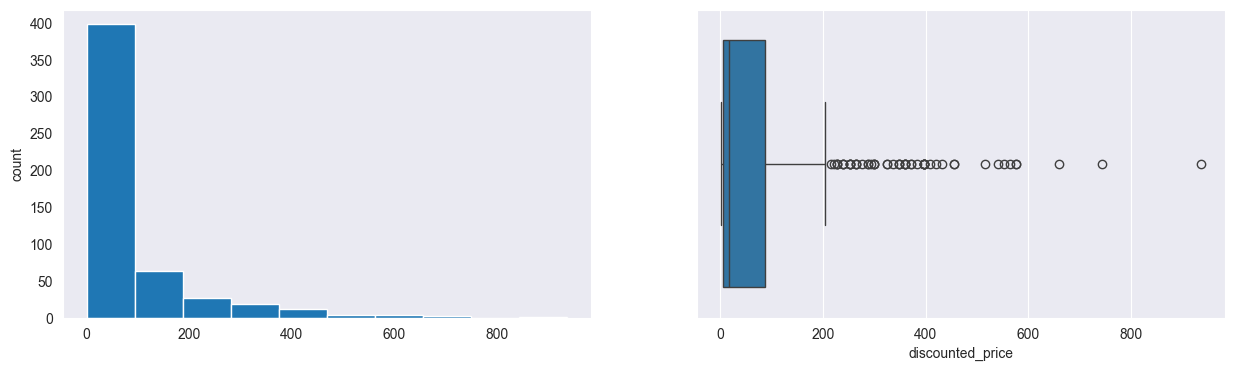

actual_price (right skewed: 3.0)


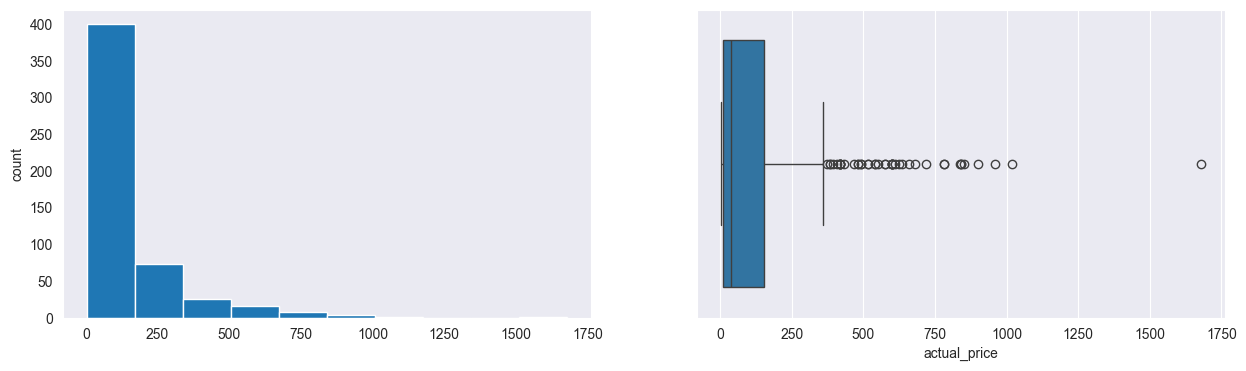

discount_percentage (left skewed: -0.29)


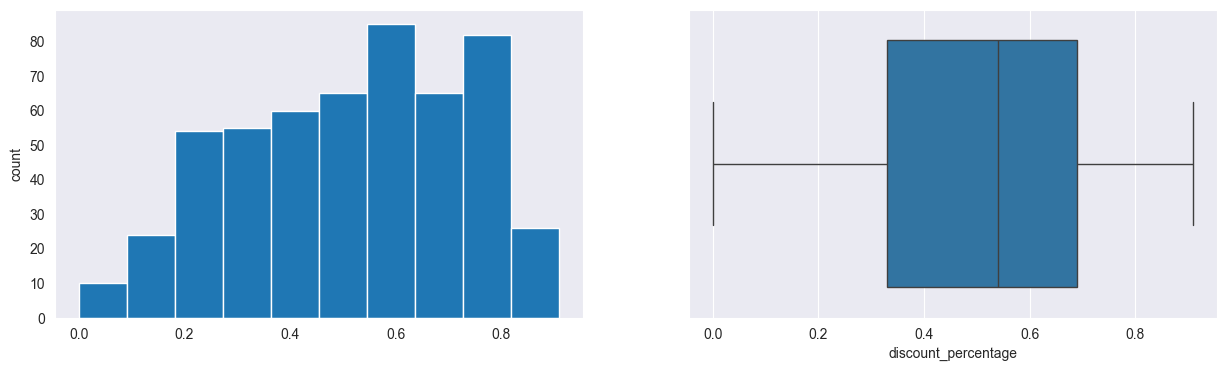

rating (left skewed: -1.01)


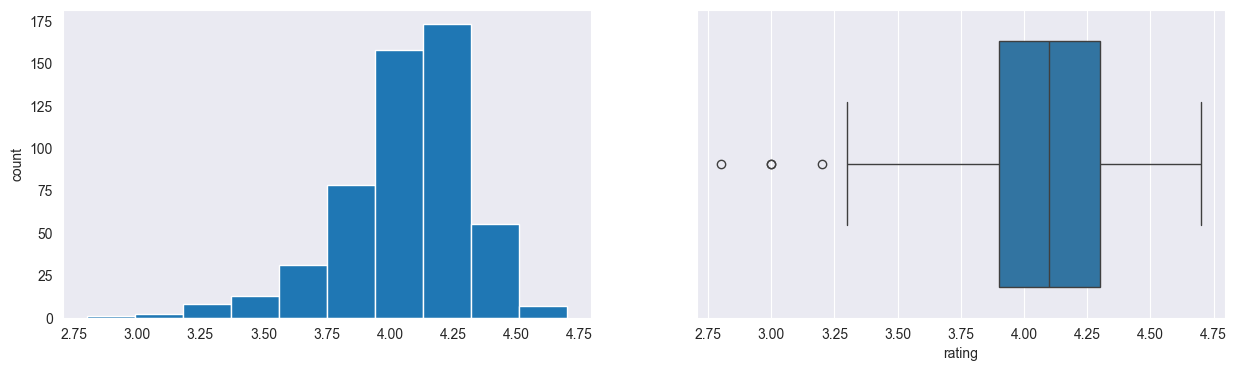

rating_count (right skewed: 4.18)


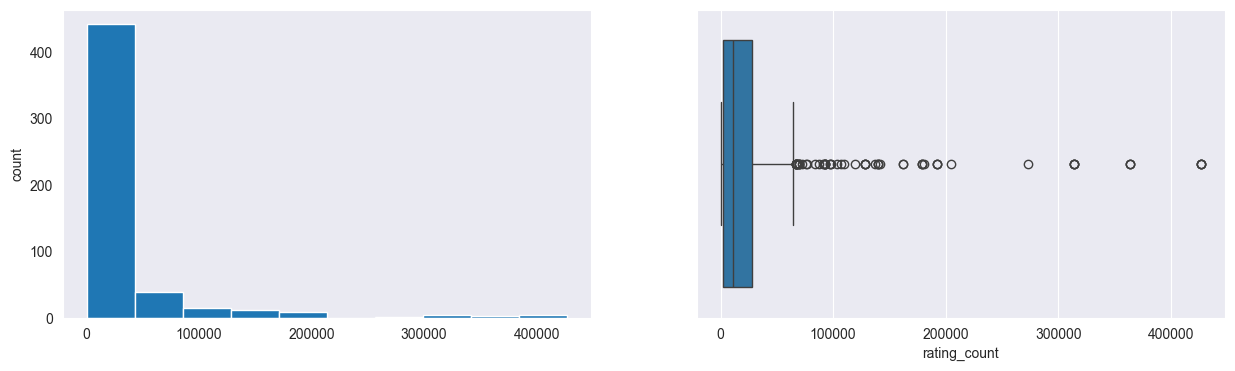

discount_amount (right skewed: 3.44)


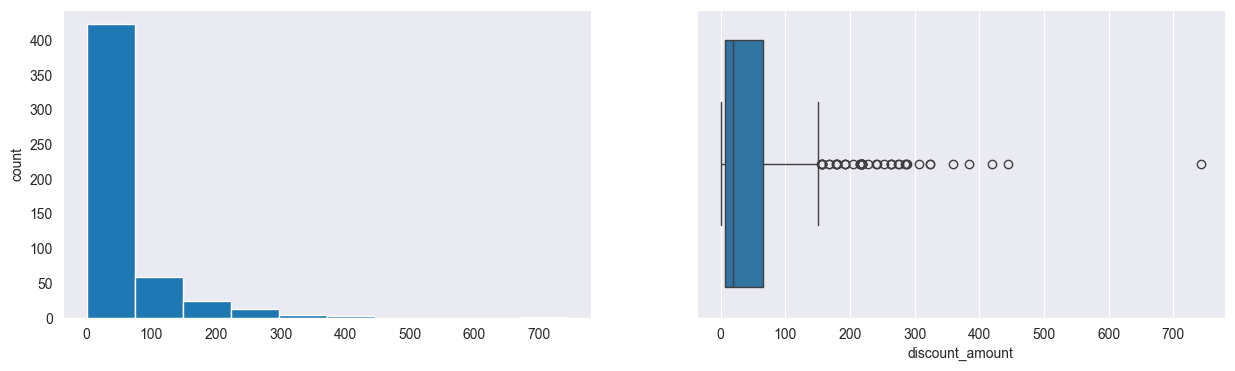

price_to_rating (right skewed: 2.6)


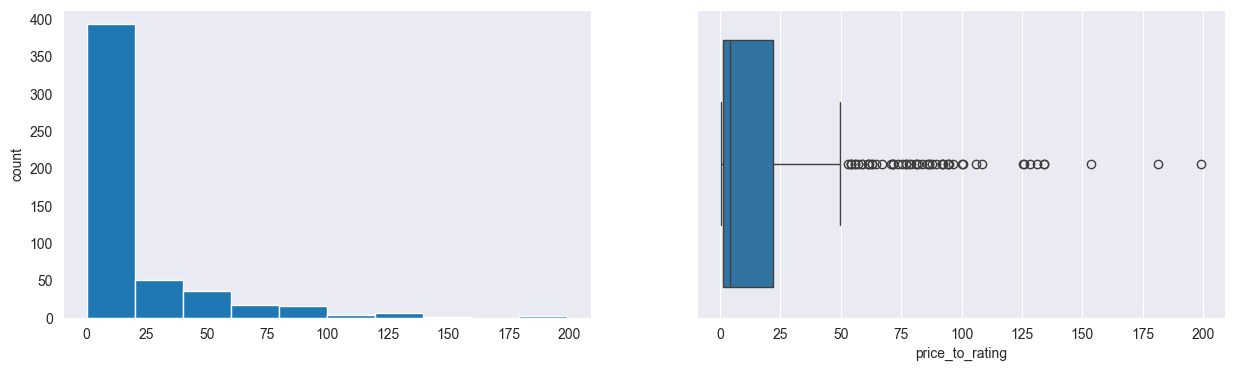

review_sentiment (right skewed: 0.03)


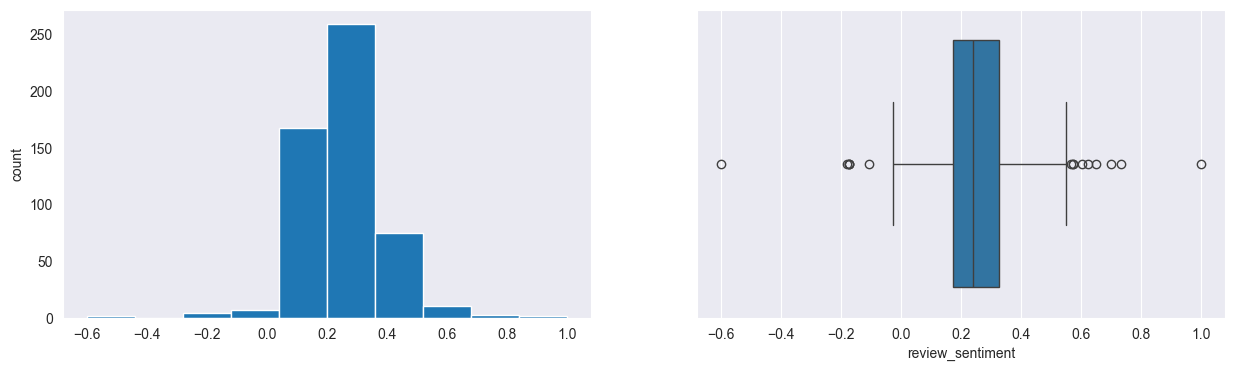

In [399]:
# Univariate Analysis on numerical columns
for col_name in numerical_cols:
    skewness = round(data[col_name].skew(), 2)
    if skewness > 0:
        print(f"{col_name} (right skewed: {skewness})")
    elif skewness < 0:
        print(f"{col_name} (left skewed: {skewness})")
    else:
        print(f"{col_name} (normal distribution)")
        
    plt.figure(figsize=(15, 4))
    
    # Generate and display histograms
    plt.subplot(1, 2, 1)
    data[col_name].hist(grid=False)
    plt.ylabel('count')
    
    # Generate and display boxplots
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col_name])
    plt.show()

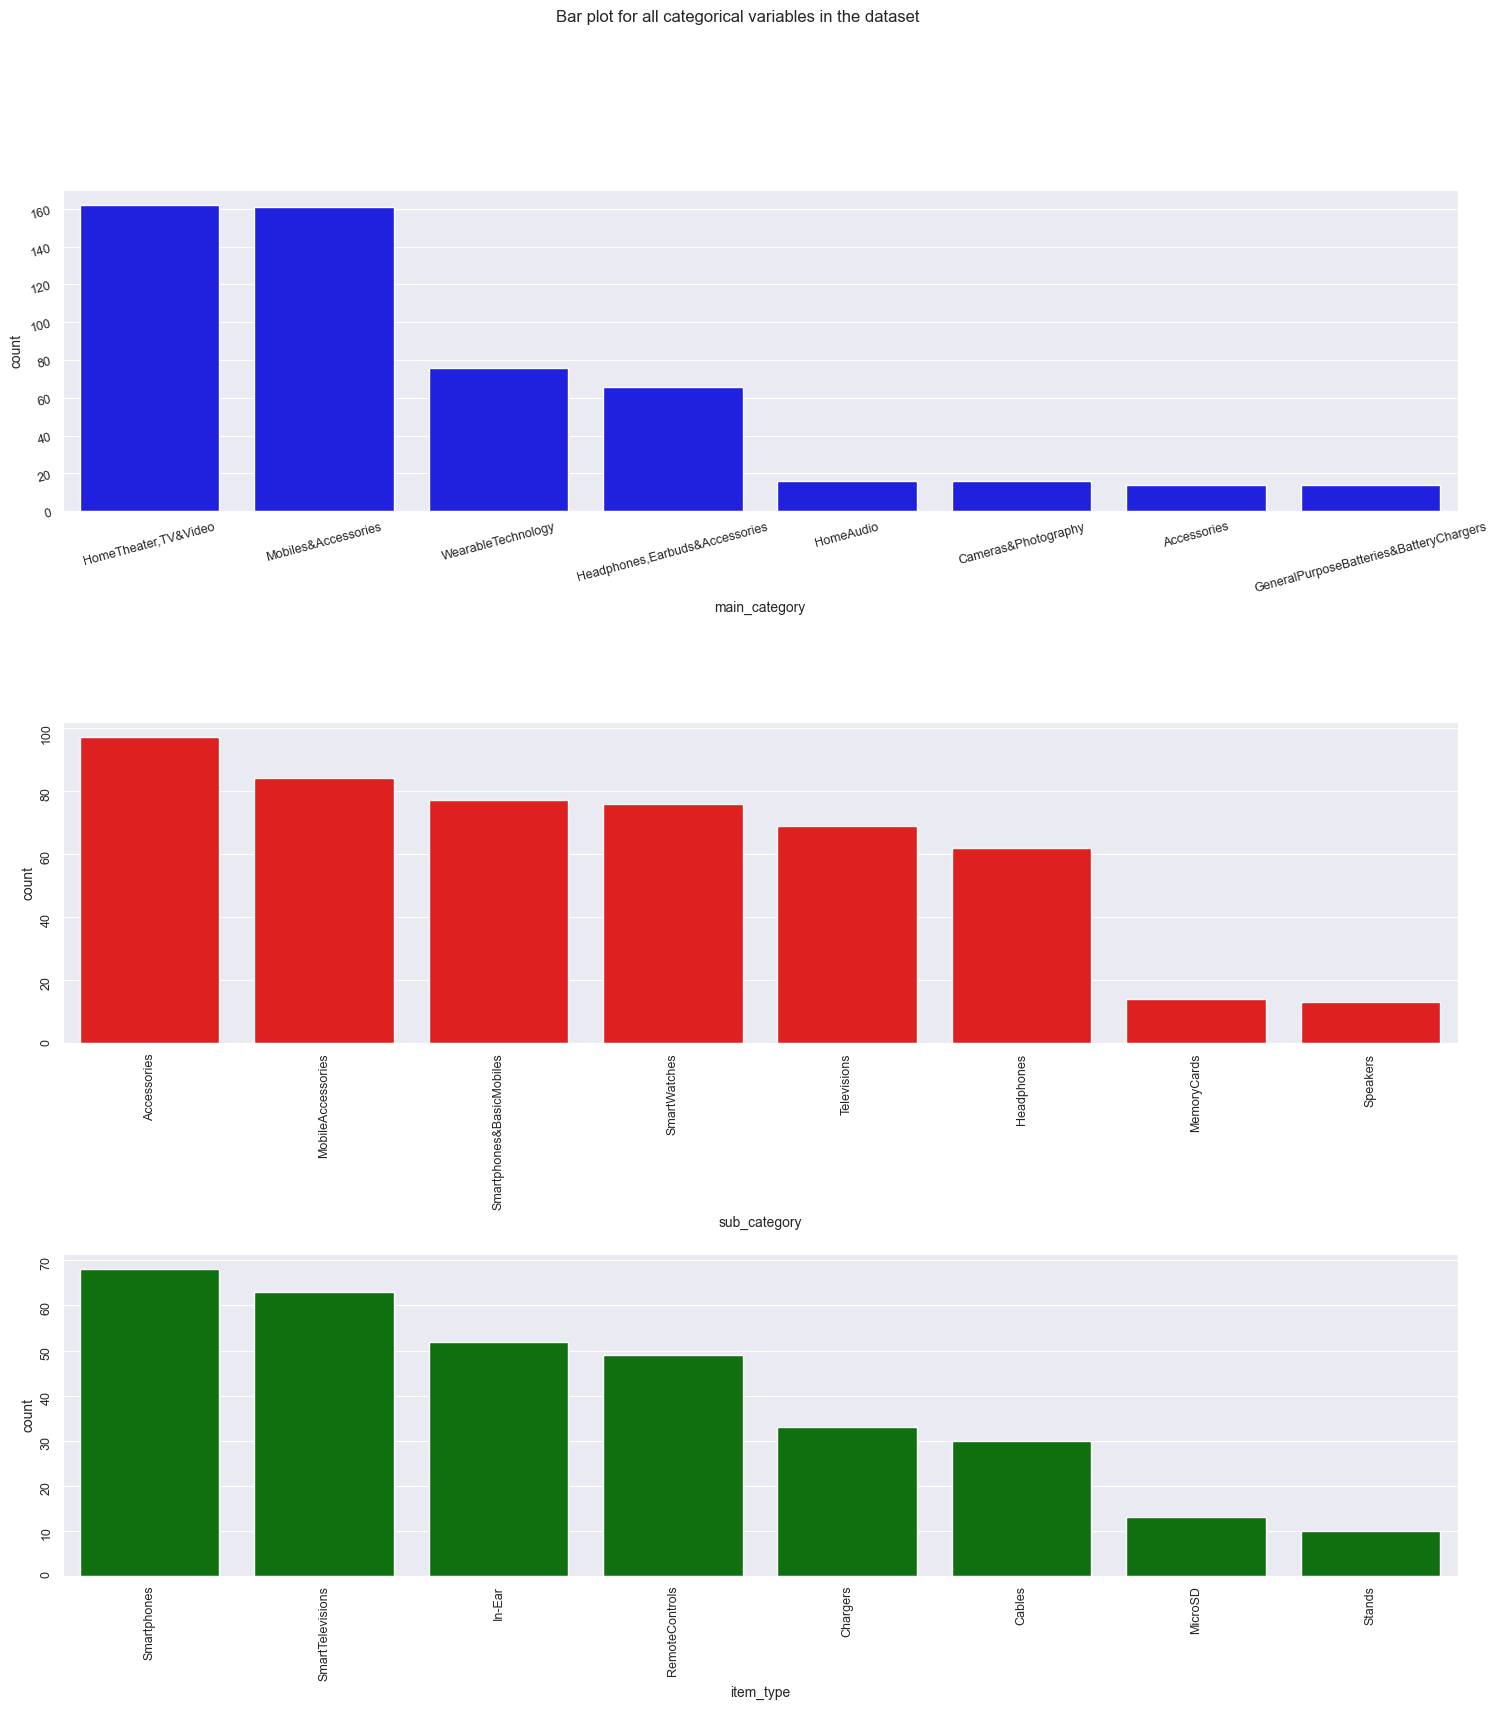

In [400]:
# Univariate Analysis on categorical columns
fig, axes = plt.subplots(3, 1, figsize=(18, 18))
fig.subplots_adjust(hspace=0.655)
fig.suptitle("Bar plot for all categorical variables in the dataset")

# Countplot for main_category column
sns.countplot(
    data=data, ax=axes[0], x='main_category', color='blue', order=data.main_category.value_counts().head(8).index
)
# Countplot for sub_category column
sns.countplot(
    data=data, ax=axes[1], x='sub_category', color='red', order=data.sub_category.value_counts().head(8).index
)
# Countplot for item_type column
sns.countplot(
    data=data, ax=axes[2], x='item_type', color='green', order=data.item_type.value_counts().head(8).index
)

axes[0].tick_params(labelrotation=15, labelsize=9)
axes[1].tick_params(labelrotation=90, labelsize=9)
axes[2].tick_params(labelrotation=90, labelsize=9)

In [401]:
def show_column_percentages(data: pd.DataFrame, columns: [str]) -> None:
    """
    Function to display the percentages of each of the provided columns.
    :param data: DataFrame containing the data to be displayed.
    :param columns: List of strings representing the column names to compute the percentages of.
    :return: None
    """
    for col in columns:
        # DataFrame containing value counts and percentage info
        percentage_df = pd.DataFrame(data=data[col].value_counts())

        # Divide the count of each category/item-type by  sum of all counts
        percentage_df['percent_of_column'] = percentage_df['count'] / df['count'].sum()
        percentage_df['percent_of_column'] = percentage_df['percent_of_column'].round(2)
        
        # Divide the count of each category/item-type name by  total number of entries in the electronics dataset
        percentage_df['percent_of_all_data'] = percentage_df['count'] / data.shape[0]
        percentage_df['percent_of_all_data'] = percentage_df['percent_of_all_data'].round(2)
        
        print(f'{percentage_df.head()}\n')

In [402]:
# Display the percentage of each category/item-type entry of the dataset
show_column_percentages(data=data, columns=['main_category', 'sub_category', 'item_type'])

                                count  percent_of_column  percent_of_all_data
main_category                                                                
HomeTheater,TV&Video              162               0.38                 0.31
Mobiles&Accessories               161               0.38                 0.31
WearableTechnology                 76               0.18                 0.14
Headphones,Earbuds&Accessories     66               0.15                 0.13
HomeAudio                          16               0.04                 0.03

                          count  percent_of_column  percent_of_all_data
sub_category                                                           
Accessories                  97               0.23                 0.18
MobileAccessories            84               0.20                 0.16
Smartphones&BasicMobiles     77               0.18                 0.15
SmartWatches                 76               0.18                 0.14
Televisions          

## Interpretations
- main_category:
    - The most prominent categories are "Home Theater, TV & Video" and "Mobiles&Accessories" with each comprising of 31% of all electronics-related purchases, indicating high purchase trends in these two categories of electronics.
    - "Wearable Technology" has a significant presence as well, comprising of 14% of all electronics purchases, but is less than half as prominent as the leading categories.
    - The distribution is not uniform, indicating that certain categories of electronics are more popular or have greater variation in products offered.
- sub_category:
    - "Accessories" and "MobileAccessories" are the most populated sub-categories, comprising of 18% and 16% of all electronics-related purchases. This suggests a high demand or interest in products within these sub-categories.
    - "Smartphones & Basic Mobiles" and "Smartwatches" also have a significant prevalence, each comprising of ~15% of purchase within these sub-categories.
    - The overall trend shows a steep decline in product count after the initial few categories, suggesting a long tail distribution where a small number of categories dominate the listings.
- item_type:
    - "Smartphones" is the most dominant item type, comprising of 16% of all item types and 13% of all electronics-related purchases. These percentages have high implications for trending consumer electronics trends.
    - There is a rapid drop-off in count after the "Smartphones" category, with categories like "Remote Controls," "Chargers," and "Cases" following but with considerably fewer counts.
    - The distribution is heavily skewed towards "Smartphones," with all other categories having significantly fewer listings.
    - The histogram demonstrates a long tail distribution, where a small number of categories have high counts and a large number of categories have low counts.

These observations could provide insight into inventory distribution, consumer interest, and potentially which areas might benefit from expanded product offerings. The dominance of certain categories suggests they are likely key drivers of traffic and sales within the electronics segment on this platform.

## Data Transformation
Discounted price, actual price, discounted amount, rating count, and price-to-rating ratio are strongly right-skewed. 
As such, a log transformation can help in normalization so that the aforementioned variables can maintain a standard scale relative to other variables.

In [403]:
def log_transform(data: pd.DataFrame, column: [str]):
    """
    Function perform log transformation on the column.
    :param data: DataFrame containing the cleaned and preprocessed dataset.
    :param column: List of strings containing the column names to transform.
    :return: None
    """
    for col_name in column:
        if (data[col_name] == 1.0).all():
            data[f"{col_name}_log"] = np.log(data[col_name] + 1)
        else:
            data[f"{col_name}_log"] = np.log(data[col_name])
    data.info()

In [404]:
# TODO: perform log transformation on discounted_price, actual_price, discounted_amount, rating, and price_to_rating
# Log transformation on discounted_price
log_transform(data=data, column=['discounted_price', 'actual_price', 'discount_amount', 'rating', 'price_to_rating'])

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 12 to 1021
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   product_id            526 non-null    object  
 1   product_name          526 non-null    object  
 2   discounted_price      526 non-null    float64 
 3   actual_price          526 non-null    float64 
 4   discount_percentage   526 non-null    float64 
 5   rating                526 non-null    float64 
 6   rating_count          526 non-null    int64   
 7   about_product         526 non-null    object  
 8   review_id             526 non-null    object  
 9   review_title          526 non-null    object  
 10  review_content        526 non-null    object  
 11  discount_amount       526 non-null    float64 
 12  price_to_rating       526 non-null    float64 
 13  review_sentiment      526 non-null    float64 
 14  main_category         526 non-null    object  
 15  sub_categ

C:\Users\Anthony Van\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
